# This code assesses the outputs of VESIcal for the Iacono-Marziano model. 
This notebook relies on the Excel spreadsheet entitled: "Testing_Iacono-Marziano_et_al_2012.xlsx"
- Test 1 compares the experimental pressures in H$_2$O-only experiments to the saturation pressures obtained from VESIcal for the "ShishkinaWater" model. 
- Test 2 compares the experimental pressures in H$_2$O-CO$_2$ experiments to the saturation pressures obtained from VESIcal for the "Shishkina" model. 
- Test 3 compares saturation pressures obtained from the web calculator hosted at http://calcul-isto.cnrs-orleans.fr/ to VESIcal outputs for compositions in the calibration dataset
- Test 4 compares saturation pressures obtained from the web calculator hosted at http://calcul-isto.cnrs-orleans.fr/ to VESIcal outputs for synthetic datasets

In [3]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [4]:
msp_fontdict = {'family': 'serif',
				 'color': 'darkblue',
				 'weight': 'normal',
				 'size': 18,}

plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.style.use("seaborn-colorblind")
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

# Test 1 -  Comparing experimental pressures to VESIcal saturation pressures for H$_2$O-only experiments

In [5]:
myfile_H2Ocal = v.ExcelFile('Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Calibration_H2O', input_type='wtpercent')
data_H2Ocal = myfile_H2Ocal.data
data_H2Ocal.head()

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,P2O5,TOTAL,CO2,H2O,Temp,Press,Fe2O3,Cr2O3,FeO,MnO,NiO,CoO
Label,,,,,,,,,,,,,,,,,,,,
This study,48.86,1.73,16.77,9.71,6.65,9.86,3.62,1.93,0.68,99.81,0,3.81,1199.85,1010,0.0,0.0,0.0,0.0,0.0,0.0
This study,48.86,1.73,16.77,9.71,6.65,9.86,3.62,1.93,0.68,99.81,0,5.09,1199.85,2135,0.0,0.0,0.0,0.0,0.0,0.0
This study,48.86,1.73,16.77,9.71,6.65,9.86,3.62,1.93,0.68,99.81,0,4.46,1199.85,1530,0.0,0.0,0.0,0.0,0.0,0.0
This study,48.86,1.73,16.77,9.71,6.65,9.86,3.62,1.93,0.68,99.81,0,4.87,1199.85,1530,0.0,0.0,0.0,0.0,0.0,0.0
This study,48.86,1.73,16.77,9.71,6.65,9.86,3.62,1.93,0.68,99.81,0,2.22,1199.85,485,0.0,0.0,0.0,0.0,0.0,0.0


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3674: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


Text(5200, 5000, '1:1')

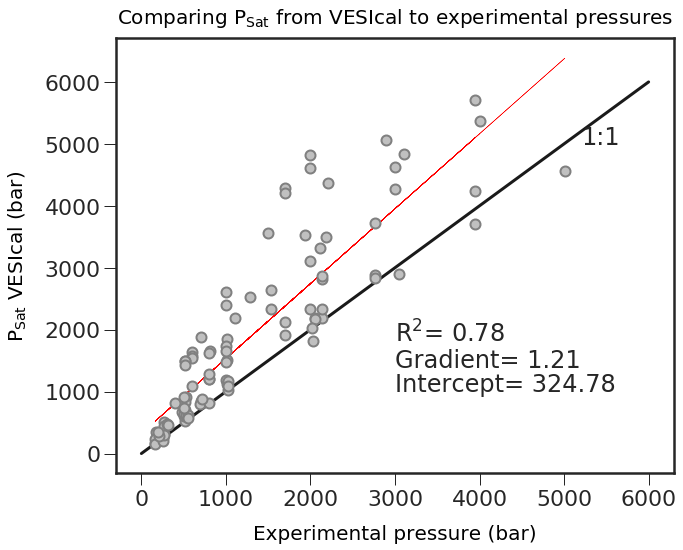

In [13]:
satPs_wtemps_Iacono_H2Ocal= myfile_H2Ocal.calculate_saturation_pressure(temperature="Temp", model='IaconoMarzianoWater')
X_Test1=satPs_wtemps_Iacono_H2Ocal['Press'] # Convert MPa from their supplement to bars
Y_Test1=satPs_wtemps_Iacono_H2Ocal['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) #& (XComb<7000) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Iacono_H2Ocal['Press'], satPs_wtemps_Iacono_H2Ocal['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 2)) 
one='1:1'
plt.plot([0, 6000], [0, 6000], color='k')
plt.text(3000, 1000, I)
plt.text(3000, 1400, G)
plt.text(3000, 1800, R)
plt.text(5200, 5000, one)


# Test 2 - Comparing experimental pressures to VESIcal saturation pressures for H$_2$O-CO$_2$ experiments

In [15]:
myfile_cal = v.ExcelFile('Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Calibration_H2OCO2', input_type='wtpercent')
data_cal = myfile_cal.data
data_cal.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Label,,,,,,,,,,,,,,,,,,
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0583,0.0255,503,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0148,0.0567,1008,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0148,0.0535,1008,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.7743,0.0895,1503,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.7020,0.0901,1503,1199.85


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3674: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


Text(5200, 5000, '1:1')

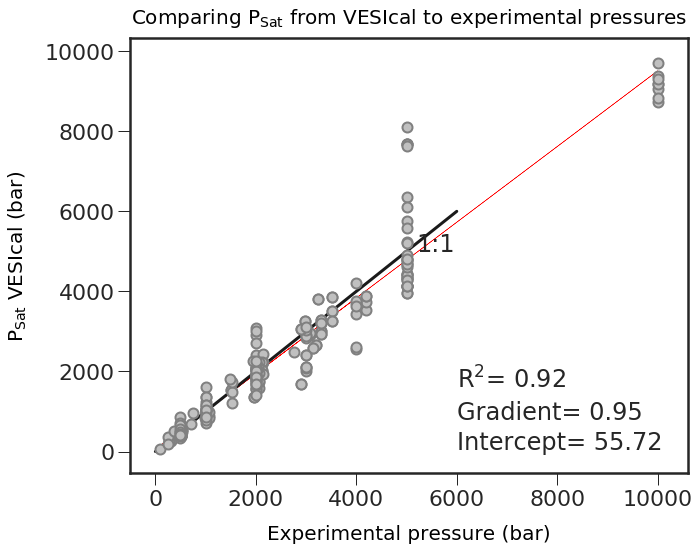

In [18]:
satPs_wtemps_Iacono_cal= myfile_cal.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
X_Test2=satPs_wtemps_Iacono_cal['Press'] # Convert MPa from their supplement to bars
Y_Test2=satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal']
mask_Test2 = (X_Test2>-1) & (Y_Test2>-1) #& (XComb<7000) # This gets rid of Nans
X_Test2noNan=X_Test2[mask_Test2].values.reshape(-1, 1)
Y_Test2noNan=Y_Test2[mask_Test2].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test2noNan,Y_Test2noNan)
Y_pred_Test2=lr.predict(X_Test2noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test2noNan,Y_pred_Test2, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Iacono_cal['Press'], satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test2noNan, Y_pred_Test2), 2)) 
one='1:1'
plt.plot([0, 6000], [0, 6000], color='k')
plt.text(6000, 50, I)
plt.text(6000, 800, G)
plt.text(6000, 1600, R)
plt.text(5200, 5000, one)


# Test 3 - Comparing Saturation pressures from the web app to VESIcal for compositions in the calibration dataset

In [19]:
myfile_web = v.ExcelFile('Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='WebCalculator', input_type='wtpercent') # This sheet is the pressures calculated using the web calculator
data_web = myfile_web.data
data_web.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,Unnamed: 16,CO2,Press,Temp,App calculator P bar,App calculator 1 sigma,Check
Label,,,,,,,,,,,,,,,,,,,,,
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,...,0.14,0.11,0.7743,895.0,0.0895,1503,1199.85,1537.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,2.8200,1460.0,0.1460,2000,1299.85,3085.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,2.1200,1170.0,0.1170,2000,1299.85,2403.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,7.9700,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,7.9700,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3674: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


Text(4000, 1600, 'R$^2$= 0.99992')

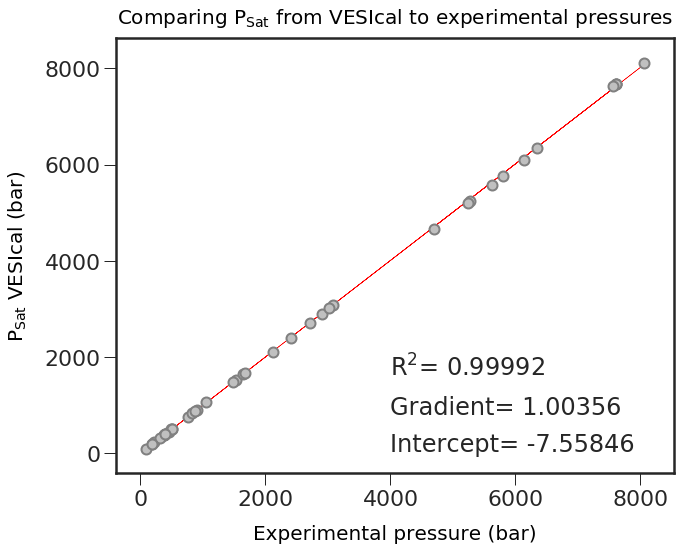

In [24]:
satPs_wtemps_Iacono_web= myfile_web.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
X_Test3=satPs_wtemps_Iacono_web['App calculator P bar'] # Convert MPa from their supplement to bars
Y_Test3=satPs_wtemps_Iacono_web['SaturationP_bars_VESIcal']
mask_Test3 = (X_Test3>-1) & (Y_Test3>-1) #& (XComb<7000) # This gets rid of Nans
X_Test3noNan=X_Test3[mask_Test3].values.reshape(-1, 1)
Y_Test3noNan=Y_Test3[mask_Test3].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test3noNan,Y_Test3noNan)
Y_pred_Test3=lr.predict(X_Test3noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test3noNan,Y_pred_Test3, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Iacono_web['App calculator P bar'], satPs_wtemps_Iacono_web['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 5))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test3noNan, Y_pred_Test3), 5)) 
one='1:1'

plt.text(4000, 50, I)
plt.text(4000, 800, G)
plt.text(4000, 1600, R)


# Test 4 - Comparing Saturation pressures from the web app to VESIcal for synthetic data

In [25]:
myfile_synweb = v.ExcelFile('Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Synthetic', input_type='wtpercent') # This sheet is the pressures calculated using the web calculator
data_synweb = myfile_synweb.data
data_synweb.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm)
Label,,,,,,,,,,,,,,,,,,,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2.0,0,0.0,0.000,0.00,1200,0
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2.0,0,0.0,0.001,14.08,1200,10
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2.0,0,0.0,0.003,42.15,1200,30
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2.0,0,0.0,0.005,70.09,1200,50
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2.0,0,0.0,0.010,139.00,1200,100


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3977: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


Text(1000, 800, 'R$^2$= 1.0')

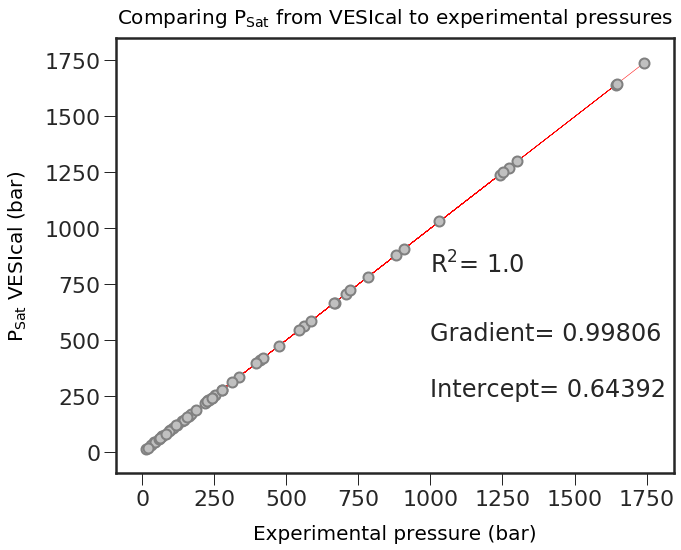

In [30]:


satPs_wtemps_Iacono_synweb= myfile_synweb.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
X_Test4=satPs_wtemps_Iacono_synweb['Press'] # Convert MPa from their supplement to bars
Y_Test4=satPs_wtemps_Iacono_synweb['SaturationP_bars_VESIcal']
mask_Test4 = (X_Test4>-1) & (Y_Test4>-1) #& (XComb<7000) # This gets rid of Nans
X_Test4noNan=X_Test4[mask_Test4].values.reshape(-1, 1)
Y_Test4noNan=Y_Test4[mask_Test4].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test4noNan,Y_Test4noNan)
Y_pred_Test4=lr.predict(X_Test4noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test4noNan,Y_pred_Test4, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Iacono_synweb['Press'], satPs_wtemps_Iacono_synweb['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 5))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test4noNan, Y_pred_Test4), 5)) 
one='1:1'

plt.text(1000, 250, I)
plt.text(1000, 500, G)
plt.text(1000, 800, R)